# the chaos game


The town of Monte Carlo is located on the northwestern coast of the Mediterranean Sea. 
It is famous for casinos and opportunities to gamble. We suppose there is an artist
living there, named Egon, who is a bit whimsical.


As I say, Egon lives in the beautiful town of Monte Carlo by the sea. In the center of 
town is the town square, a large flat plaza paved with bricks. Egon wishes to paint something 
on the bricks of the town square but for a time he was uninspired... until one day he found
a discarded dice. When he rolls it he finds that the top face comes up either 1, 2, 3, 4, 5 
or 6, at random. He also finds that he cannot reliably predict what that number will be. 
This gives him an idea for a painting at last.


* Early one morning Egon sets three empty paint cans A, B and C on the ground to make a huge triangle in the town square
* He walks to some random location on the town square where he can see his three paint cans forming the corners of a large triangle, 137 feet to each side
    * The 137 feet is not important here; it is just for our amusement
* Egon rolls his dice.
    * On a 1 or a 2 he walks half way to paint can A
    * On a 3 or a 4 he walks half way to paint can B
    * On a 5 or a 6 he walks half way to paint can C
    * He then paints a dot on the ground at his feet
* From that new spot: Egon repeats the process: 
    * He rolls the dice
    * He uses the same method to select a destination paint can
    * He walks half way to that paint can 
    * He paints a dot


(If you have ever heard of Ms. Halfway this might sound familiar!)


If Egon repeats the process 17 times he will have 17 dots. But he does not stop at 17. 
He keeps on going and going and going, rolling, walking half way, 
painting a dot, until the sun goes down. Here is the challenge in two parts:


- What does the resulting painting look like, your guess?
- Use a computer program to draw 100,000 of Egon's dots


> Egon is stumbling home in bluing and rags...




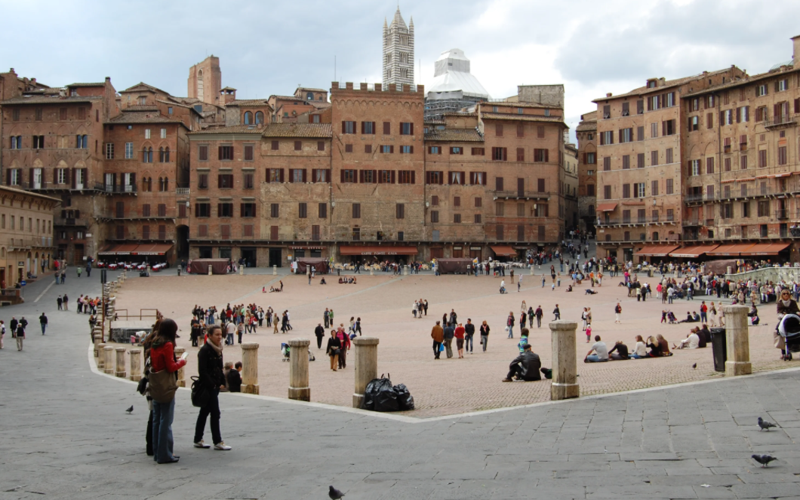

In [2]:
import os, requests, shutil
from pathlib import Path
from PIL import Image

def dirobj(obj): return [x for x in dir(obj) if not x.startswith('__')]
def lsal(path=''): return os.popen('ls -al ' + path).readlines()

Image.open('../../images/egon/piazza_del_campo.png').resize((800,500))

## Fossil text


One day as Egon was sipping coffee in the piazza he happened to notice a dice nearby on 
the ground. He picked it up and began idly rolling it, each time noting that it gave him
a number from one to six. He had with him three empty paint cans, a full can of orange
paint, a paintbrush and a tape measure. Suddenly Egon was struck with an idea for a painting: He would 
let the dice decide how to go about painting the bricks of the piazza. (There weren't many
people around as it was early on a Tuesday morning.) Here is what he did:


First Egon set out the three empty paint cans -- we will call them R, G, and B for *red*, *green*
and *blue* -- on the ground in a trianglular arrangement: Each can was separated by about 30 steps 
from the other two. This staked out a fairly large equilateral triangle. 
He then selected a random location nearby as his starting point and with the brush he painted 
an orange dot on the ground.


Next he bent down and rolled the dice on the ground, asking it 'which way shall we go?' He had
decided that if it came up 1 or 2 he would move towards the empty *red* paint can. If a 3 or 4 
he would move towards the empty *green* paint can. If a 5 or 6 he would move towards the empty
*blue* paint can. The dice came up 2, so Egon picked it up and looked towards the red paint can.
But how far to go? Egon thought 'If I go all the way to the paint can I will be painting the
same orange dots over and over... so instead I will only go half-way to each paint can.'


Egon used his tapemeasure to lay out the line from the first orange dot to the red paint can. 
Halfway along this line he painted a second orange dot. And now he once again rolled the dice
and asked 'which way shall we go?' This time it came up 3; so again he layed out the tapemeasure,
this time from the second orange dot to the green paint can. And halfway along this new line 
he painted a third orange dot. Then once again out came the dice, the roll selected the next paint
can, the tapemeasure gave the half-way point, a new orange dot was painted, and so on and so 
on and so on for the rest of the morning. 



## Interactive Egon painting maker


In [4]:
# import the numerical Python library
import numpy as np
from random import random as can_coord
from random import randint
from ipywidgets import *
from traitlets import dlink
from matplotlib import pyplot as plt

canR = np.array([0.0, 0.0])
canG = np.array([1.0, 0.0])
canB = np.array([0.5, np.sqrt(3.0)/2.0])

canDict   = {0:canR, 1:canG, 2:canB}
colorDict = {0:'r', 1:'g', 2:'b'}

# This is a method for jumping half way to point 'b' from point 'a'
def MoveHalfway(a, b): return a + 0.5*(b-a)

def EgonPaints(nDotsParameter):

    nDots = 16 + nDotsParameter**2
    x = [[MoveHalfway(canG, canR), 'r']]        # list of 2-element lists
    
    # This loop does all of Egon's work for him
    for i in range(nDots): 
        next_can = randint(0,5)//2
        x.append([MoveHalfway(x[-1][0], canDict[next_can]), colorDict[next_can]])

    print('total number of dots Egon just painted is', nDots + 1)
    print(len(x))
    
    # this breaks out Egon's dot locations into two lists: xc[] and yc[]
    xc, yc, mycolor = [q[0][0] for q in x], [q[0][1] for q in x], [q[1] for q in x]
    
    # Figure needs to be big but small enough to fit on the screen with the slider
    figdim = 12
    fig, ax = plt.subplots(figsize=(figdim,figdim))

    # This chooses a dot size based on how many dots (nDots) 
    # if    nDots < 100:  dotsize = 100
    # elif  nDots < 800:  dotsize = 30
    # elif  nDots < 5000: dotsize = 12
    # else:               dotsize = .1
    
    dotsize = .3
    
    ax.scatter(xc, yc, s=dotsize, marker='.', c=mycolor)
    ax.set(xlim = [0., 1.], ylim = [0., .89])
    # fig.show()

interact(EgonPaints, nDotsParameter=widgets.IntSlider(min=1,max=500,step=1,value=1, continuous_update=False))

interactive(children=(IntSlider(value=1, continuous_update=False, description='nDotsParameter', max=500, min=1…

<function __main__.EgonPaints(nDotsParameter)>

### Egon's painting


* Did you guess this would be the result? 
* Does the result resemble anything else you have come across?
* How could you change the procedure?
* Why does this result look the way it does?


*Connection*: Please be aware that a related problem is presented in the **Infinity** notebooks. That problem concerns
the meanderings of a certain Mister a/b. 

*Connection*: Please be aware that a related problem is presented in the **Meru Prastarah** notebooks. 

### Changing the rules


- Egon did not have to begin with three paint cans... He could have used six or five or 19. 
- Egon did not have to go half way to the next paint can... he could have gone 0.6 of the way or 0.2 of the way.
- Egon did not have to place his paint cans in a regular triangle... he could have placed them randomly.



The code below allows you to explore these rule changes. 


```
nPaintCans = 3
howfar = 0.5
randomPaintCanLocations = False
```

Changing the number of paint cans is easy: Just change the '3' to whatever you like. 


**howfar** has a value of 0.5, in other words go half way. You might try making it a little bigger or smaller. 


**randomPaintCanLocations** is set to **False**. You can make the paint can 
locations random by changing this value to **True**. It must start with a capital-T: True.


This program takes about a minute to produce results. It uses different colors of paint for the dots
depending which paint can Egon selects.


The program below changes the rules.
There are two slider controls and a check box. The top slider is how many paint cans Egon uses. 
The second slider is how far Egon moves towards the next paint can. (Remember we did this above
with 1/2.) The checkbox will make the paint can locations random instead of evenly placed about
the square.

In [5]:
import numpy as np
import random as r
from ipywidgets import *
from traitlets import dlink

%matplotlib inline 

# recursive method to generate paint dot locations
def FollowManyPaths(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod):     
    if level == endLevel: return
    for i in range(nCans):
        q = a + howFar*(v[i]-a)
        x.append(q[0])
        y.append(q[1])
        mycolors.append(colorList[i%colormod])
        FollowManyPaths(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod)
    return

def EgonVariations(nCans, howFar, locationsRandom):
    # v is the vertices list (2-element numpy arrays); x and y are float coordinate lists
    v, x, y, mycolors = [], [], [], []
    colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
    x.append(0.5)
    y.append(0.5)
    mycolors.append('k')

    # nDepth is the recursion depth of the algorithm
    if nCans <= 3: nDepth = 10
    elif nCans == 4: nDepth = 8
    elif nCans == 5: nDepth = 7
    elif nCans == 6: nDepth = 6
    elif nCans == 7: nDepth = 6
    elif nCans <= 10: nDepth = 5
    elif nCans <= 15: nDepth = 4
    else: nDepth = 3

    # place our paint cans
    if locationsRandom:
        for i in range(nCans): v.append(np.array([r.random(), r.random()]))
    else:
        centerx, centery, radius = 0.5, 0.5, 0.5
        delta_angle = np.pi * 2.0 / float(nCans)
        this_angle = 0.0
        for i in range(nCans):
            v.append(np.array([radius * np.cos(this_angle) + centerx, radius * np.sin(this_angle) + centery]))
            this_angle += delta_angle

    # recursive paint-dot locator... all the myriad ways
    FollowManyPaths((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList))

    # Draw the scatter plot of (x, y) pairs
    figdim = 10
    plt.figure(figsize=(figdim,figdim))

    # The ',' comma marker is a small dot, as is the period '.' marker
    plt.scatter(x, y, s=1, marker='.', color=mycolors)
    if howFar >= 0.0 and howFar <= 1.0:
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])

# this sets up the controls: 2 sliders plus the checkbox
interact(EgonVariations, \
         nCans=widgets.IntSlider(min=2,max=13,step=1,value=3,continuous_update=False),\
         howFar=widgets.FloatSlider(min=-2.0,max=2.0,step=.01,value=0.5,continuous_update=False),\
         locationsRandom=widgets.Checkbox(value=False,continuous_update=False)\
        )

interactive(children=(IntSlider(value=3, continuous_update=False, description='nCans', max=13, min=2), FloatSl…

<function __main__.EgonVariations(nCans, howFar, locationsRandom)>

In [ ]:
# recursive method to generate paint dot locations
def FollowManyPaths(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod):     
    if level == endLevel: return
    for i in range(nCans):
        q = a + howFar*(v[i]-a)
        x.append(q[0])
        y.append(q[1])
        mycolors.append(colorList[i%colormod])
        FollowManyPaths(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod)
    return

def Chaos4(howFar, can4x, can4y):

    nCans = 4
    
    # v is the vertices list (2-element numpy arrays); x and y are float coordinate lists
    v, x, y, mycolors = [], [], [], []
    colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
    x.append(0.5)
    y.append(0.5)
    mycolors.append('k')

    # nDepth is the recursion depth
    nDepth = 8

    # place our paint cans
    centerx, centery, radius = 0.5, 0.5, 0.5
    delta_angle = np.pi * 2.0 / float(nCans)
    this_angle = 0.0
    for i in range(nCans - 1):
        v.append(np.array([radius * np.cos(this_angle) + centerx, radius * np.sin(this_angle) + centery]))
        this_angle += delta_angle

    # Add a 4th can at some slider-controlled location
    v.append(np.array([can4x, can4y]))

    # recursive paint-dot locator... all the myriad ways
    FollowManyPaths((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList))

    # Draw the scatter plot of (x, y) pairs
    figdim = 10
    plt.figure(figsize=(figdim,figdim))

    # The ',' comma marker is a small dot, as is the period '.' marker
    plt.scatter(x, y, s=1, marker='.', color=mycolors)
    if howFar >= 0.0 and howFar <= 1.0:
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])

# this sets up the controls: 2 sliders plus the checkbox
interact(Chaos4, howFar=widgets.FloatSlider(min=-2.0,max=2.0,step=.01,value=0.5, continuous_update=False),
        can4x=widgets.FloatSlider(min=0.,max=1.,step=.05,value=0.5),
        can4y=widgets.FloatSlider(min=0.,max=1.,step=.05,value=0.))

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from random import randint, random

# Sample 3D data: x = list(np.random.rand(100)) etcetera

x, y, z = [], [], []

vx = [0., 1., 0.5, 0.5]
vy = [0., 0., .86, 0.33] 
vz = [0., 0., 0., 1.]

xe = random()
ye = random()
ze = random()

ndots = 20000
for i in range(ndots):
    idx = randint(0, 3)
    xe = xe + (vx[idx] - xe)/2
    ye = ye + (vy[idx] - ye)/2
    ze = ze + (vz[idx] - ze)/2
    x.append(xe)
    y.append(ye)
    z.append(ze)

def ThreeDee(theta, phi):

    # Create a figure and a 3D axes
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=phi, azim=theta)
    
    # Scatter plot
    ax.scatter(x, y, z, c='k', marker='.', s=6)
    
    # Set labels
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    
    # Display the plot
    plt.show()


# this sets up the controls: 2 sliders plus the checkbox
interact(ThreeDee, theta=widgets.FloatSlider(min=-10.,max=100.,step=.1,value=90.),
                   phi=widgets.FloatSlider(min=-30.,max=120.,step=.1,value=28.))

How does Egon's painting procedure work?

In [ ]:
Image.open('../../images/egon/pointillist_room.png').resize((800,500))

*Why you are never to leave Egon alone in your living room*

Some time later Egon thought 'I could modify my procedure... would it make my paintings more interesting?' 


His first idea is to only select a new vertex if it was not the one he just chose. 
Suppose he chooses vertex *A* among A, B, and C. Then his next choice must be from among 
only B and C, not A. A is allowed on the step after this one.

In [ ]:
import numpy as np
import random as r
from ipywidgets import *
from traitlets import dlink


# FMP stands for 'follow many paths'
#   This means that Egon gets all possible outcomes on his dice at once
#   We have four states of the two radio button choices...
#     noRepeats is True: We can never select the same vertex twice
#     noNextClockwise is True: We can never select the next-clockwise vertex
#   So FMP0R0N means both are False
#      FMP1R1N means both are True
# recursive methods to generate paint dot locations
# a is an x, y tuple of where we are
# level is the depth for bailing out
# endLevel is the bail out level
# nCans is how many vertices we have
# colorList is the colors indexed by vertex
# howFar is the distance to move
# v is a list of nCans vertics as x, y tuples
# x, y and mycolors are extensible lists of coordinates and colors
# colormod is the modulus to make sure we get a good color
# thisTarget is the index of the vertex we were headed towards when we landed here
def FMP1R0N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != thisTarget:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP1R0N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def FMP0R1N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != (thisTarget + 1)%nCans:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP0R1N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def FMP1R1N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != thisTarget and i != (thisTarget + 1)%nCans:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP1R1N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def EgonVariations(nCans, howFar, noRepeats, noNextClockwise):
    # v is the vertices list (2-element numpy arrays); x and y are float coordinate lists
    v, x, y, mycolors = [], [], [], []
    colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
    x.append(0.5)
    y.append(0.5)
    mycolors.append('k')

    # nDepth is the recursion depth of the algorithm
    if nCans <= 3: nDepth = 10
    elif nCans == 4: nDepth = 9
    elif nCans == 5: nDepth = 8
    elif nCans == 6: nDepth = 7
    elif nCans == 7: nDepth = 6
    elif nCans <= 10: nDepth = 5
    elif nCans <= 15: nDepth = 4
    else: nDepth = 3

    # place our paint cans regularly (no random location option)
    centerx, centery, radius = 0.5, 0.5, 0.5
    delta_angle = np.pi * 2.0 / float(nCans)
    this_angle = 0.0
    for i in range(nCans):
        v.append(np.array([radius * np.cos(this_angle) + centerx, radius * np.sin(this_angle) + centery]))
        this_angle += delta_angle

    # recursive paint-dot locator... all the myriad ways
    if noRepeats and not noNextClockwise:
        FMP1R0N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    elif not noRepeats and noNextClockwise: 
        FMP0R1N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    elif noRepeats and noNextClockwise:
        FMP1R1N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    else:
        print("Both radio buttons are off! Use the version on the 1 C Monte Carlo notebook for this!")

    # Draw the scatter plot of (x, y) pairs
    figdim = 13
    plt.figure(figsize=(figdim,figdim))

    # The ',' comma marker is a small dot, as is the period '.' marker
    plt.scatter(x, y, s=1, marker='.', color=mycolors)
    if howFar >= 0.0 and howFar <= 1.0:
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])

# this sets up the controls: 2 sliders plus the checkbox
interact(EgonVariations, \
         nCans=widgets.IntSlider(min=2,max=13,step=1,value=4,continuous_update=False),\
         howFar=widgets.FloatSlider(min=-2.0,max=2.0,step=.01,value=0.5,continuous_update=False),\
         noRepeats=widgets.Checkbox(value=False,continuous_update=False),
         noNextClockwise=widgets.Checkbox(value=True,continuous_update=False)\
        )

### Calculate $\pi$ using Monte Carlo (random numbers)


Here is a challenge: If you could generate a million random numbers between 0 and 1... how could you use those numbers to calculate $\pi$???


We calculate $\pi$ using random darts. Each dart lands in a square; either inside or outside a circle. We will not be able to calculate pi very *accurately* using this first idea; but approximate will be fun! 


Both of these ideas rely on the notion that the area of a circle with a radius of 1 is pi. The argument for this idea is built into one of the other math club team activities. 

In [ ]:
# This is a Monte Carlo method program.
# Throw some darts at a dart board: If they land inside a quarter-circle they are 'hits'
# The ratio of hits to darts is the ratio of the quarter circle to a square of area 1
# Can you determine why we then multiply by four to get the area of the circle?
from ipywidgets import *
from traitlets import dlink
import numpy as np
import random as r

def ThrowDarts(dParam):
    x,y,c=[],[],[]
    hits = 0.0
    nDarts = dParam**3 + 5
    for i in range(nDarts):
        xd, yd = r.random(), r.random()
        if xd*xd+yd*yd < 1.0: 
            hits += 1.0
            c.append('r')
        else: c.append('k')
        x.append(xd)
        y.append(yd)
    if nDarts < 1000000: 
        print('In Monte Carlo we threw', nDarts, 'darts so the circle area is about', '%.7f' % (4.0*hits/nDarts))
    else: 
        print('%3.1f' % (nDarts/1000000.), 'million darts, circle area ~', '%.7f' % (4.0*hits/nDarts))

    # standard plot
    if nDarts < 200000:
        print('(hang on for a couple seconds while the picture gets drawn)')
        figdim = 5
        plt.figure(figsize=(figdim,figdim))
        plt.axis('equal')
        plt.scatter(x, y, s=1, marker='.', color=c)
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])
        plt.show()
    else: print('(Use less than two hundred thousand darts to see a picture of where they all landed)')

interact(ThrowDarts, dParam=widgets.IntSlider(min=1,max=200,step=1,value=1, continuous_update=False))

# ${\Huge \ngtr}$


Alas this is where the sidewalk ends and where the work begins... on what comes next. Everything below here is *under construction*.

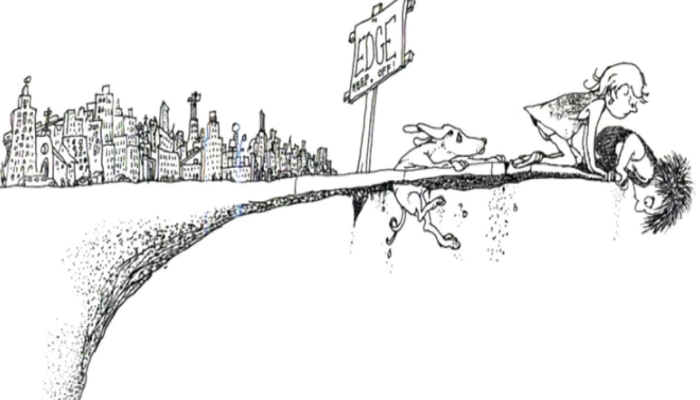

In [16]:
from PIL import Image
Image.open('./../../images/people/where_the_sidewalk_ends.png').resize((700,400))

### Sally the Pirate

Sally the Pirate arrives in the port town of Monte Carlo. She enters the harbor marina and ties
her ship up at the end of one of the many piers. This done she goes ashore to have some supper; 
and then she returns to the marina where her ship is waiting. At the end of the pier. In fact
pier 42. (A pier is like a *dock*; a long thin rectangle where people tie up their boats.)
This pier is 100 paces long by 20 paces across. 

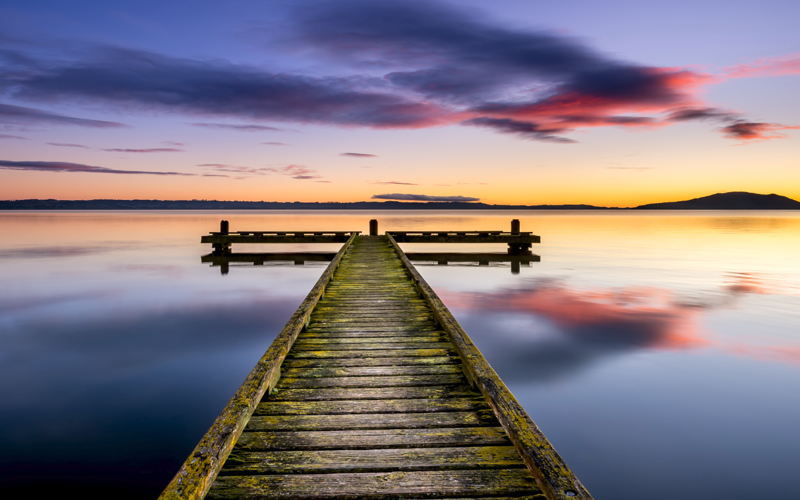

In [17]:
Image.open('./../../images/misc/wharf.png').resize((800,500))

As Sally walks along the wharf towards pier 42 she passes many boats... but alas,
owing to it is dark out, she accidentally bumps her head on one of the anchors. As a result she
is now very dizzy. She manages to arrive at pier 42 and she sees her pirate ship 100 paces away 
at the far end. Once she gets back aboard she can lie down and recover... but she is still so dizzy 
that every pace she takes forward comes with an additional random stumble-pace either to the left 
or the right.  


Sally begins pacing across the pier from the half-way location, so ten paces from either edge
of the pier. We say that her lateral coordinate is 10 paces and her starting longitudinal coordinate
is zero paces. She begins walking off the 100 paces to her ship. 


If Sally is unfortunate her random sideways stumbles will bring her to one of the two 
edges of the pier and she will fall into the water. This happens when her lateral coordinate is 
either 0 or 20 paces.


What are the odds she will reach her ship (longitudinal coordinate 100) without falling off the pier?

In [13]:
import numpy as np
from random import randint
from ipywidgets import *

def SallyWalksThePier(width, length):
    nTrials = 1000
    nFallOff = 0
    for i in range(nTrials):
        lateralPosition = width/2
        longitudinalPosition = 0
        for steps in range(length):
            longitudinalPosition += 1
            lateralPosition += 2*randint(0,1) - 1
            if lateralPosition == 0 or lateralPosition == width:
                nFallOff += 1
                break
    ratio = nFallOff/nTrials
    print('Odds of falling off the pier: ' + str(round(100*ratio, 2)) + '%')

interact(SallyWalksThePier, width=widgets.IntSlider(min=2,max=200,step=2,value=20, continuous_update=False),\
                            length=widgets.IntSlider(min=2,max=500,step=2,value=100, continuous_update=False))

interactive(children=(IntSlider(value=20, continuous_update=False, description='width', max=200, min=2, step=2…

<function __main__.SallyWalksThePier(width, length)>

In [9]:
import numpy as np
from random import randint
from ipywidgets import *
from traitlets import dlink

# nope: from JSAnimation import FuncAnimation

from matplotlib import animation

# put the resulting figure below this cell in the browser
# %pylab inline

# create a simple animation
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 200), ylim=(-10, 10))
# line, = ax.plot([], [], lw=2)
# x = np.linspace(0, 10, 1000)

xc, yc, c = [],[],[]
nStepsWide = 21
nStepsLong = 100

def SallyWalksTheWharf(frameNumber):
    global xc, yc, c, nStepsWide, nStepsLong
    x0 = 0
    y = 0
    x = [np.array([x0, y])]
    c = ['k']
    # taking the loop out so as to make the method the iterated code
    # for i in range(1, nStepsLong+1):
    y += 2*randint(0, 2)-1
    x.append([i, y])
    c.append('r')
    xc, yc = [q[0] for q in x], [q[1] for q in x] 
    figWid = nStepsLong * 14 / 100
    figHgt = nStepsWide * 3 / 21
    plt.figure(figsize=(figWid,figHgt))
    plt.axes(xlim=(0, nStepsLong), ylim=(-nStepsWide/2, nStepsWide/2))
    plt.scatter(xc, yc, s=160, marker='.', color=c)
    plt.plot(xc, yc, lw=2, color='k')
    
# SallyWalksTheWharf(21,100)
interact(SallyWalksTheWharf, nStepsWide=widgets.IntSlider(min=1,max=100,step=1,value=21, continuous_update=False),\
                             nStepsLong=widgets.IntSlider(min=1,max=200,step=1,value=100, continuous_update=False))

def initSally():
    line.set_data([], [])
    return line,

def animateSally(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

# animation.FuncAnimation(fig, SallyWalksTheWharf, init_func=initSally, frames=100, interval=1, blit=True)

In [ ]:
# oh dear this is dreadful
# we should be using 
# !conda install JSAnimation

if False:
    !pwd; \
    cd ..; \
    mkdir js2; \
    cd js2; \
    pwd; \
    wget https://github.com/jakevdp/JSAnimation/archive/master.zip; \
    unzip master.zip; \
    cd JSAnimation-master; \
    python setup.py install --user; \
    pwd


In [7]:
"""
Lorenz animation
Adapted from http://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/
"""

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

from JSAnimation import HTMLWriter

N_trajectories = 20


def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 2, 500)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t) for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c) for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c, ms=4) for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i + 1].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=30, blit=True)

# set embed_frames=False so that frames will be stored individually
anim.save('lorenz_animation.html', writer=HTMLWriter(embed_frames=False))

SyntaxError: Function parameters cannot be parenthesized (1471828985.py, line 19)

In [8]:
from JSAnimation import examples

%pylab inline
examples.basic_animation()

# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=20, blit=True)

ModuleNotFoundError: No module named 'JSAnimation'